# Rozpoznawanie typów Pokemonów

###### Konrad Magiera 291090, Mateusz Smoliński 291099

`Importy` potrzebne do całości projektu

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'termcolor'

In [69]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon = pokemon.drop(["#"],axis = 1)
pokemon = pokemon.set_index('Name')
pokemon.rename(columns={'Type 1':'Type1', 'Type 2':'Type2', 'Sp. Atk':'SpAtk', 'Sp. Def':'SpDef'}, inplace=True)
dostepne_typy = pokemon.Type1.unique()
pokemon_bez_nan = pokemon.copy()
pokemon_bez_nan['Type2'].fillna(value='None', inplace=True)
pokemon.head()

Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
Name                                                                      
Bulbasaur              Grass  Poison    318  45      49       49     65   
Ivysaur                Grass  Poison    405  60      62       63     80   
Venusaur               Grass  Poison    525  80      82       83    100   
VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   
Charmander              Fire     NaN    309  39      52       43     60   

                       SpDef  Speed  Generation  Legendary  
Name                                                        
Bulbasaur                 65     45           1      False  
Ivysaur                   80     60           1      False  
Venusaur                 100     80           1      False  
VenusaurMega Venusaur    120     80           1      False  
Charmander                50     65           1      False

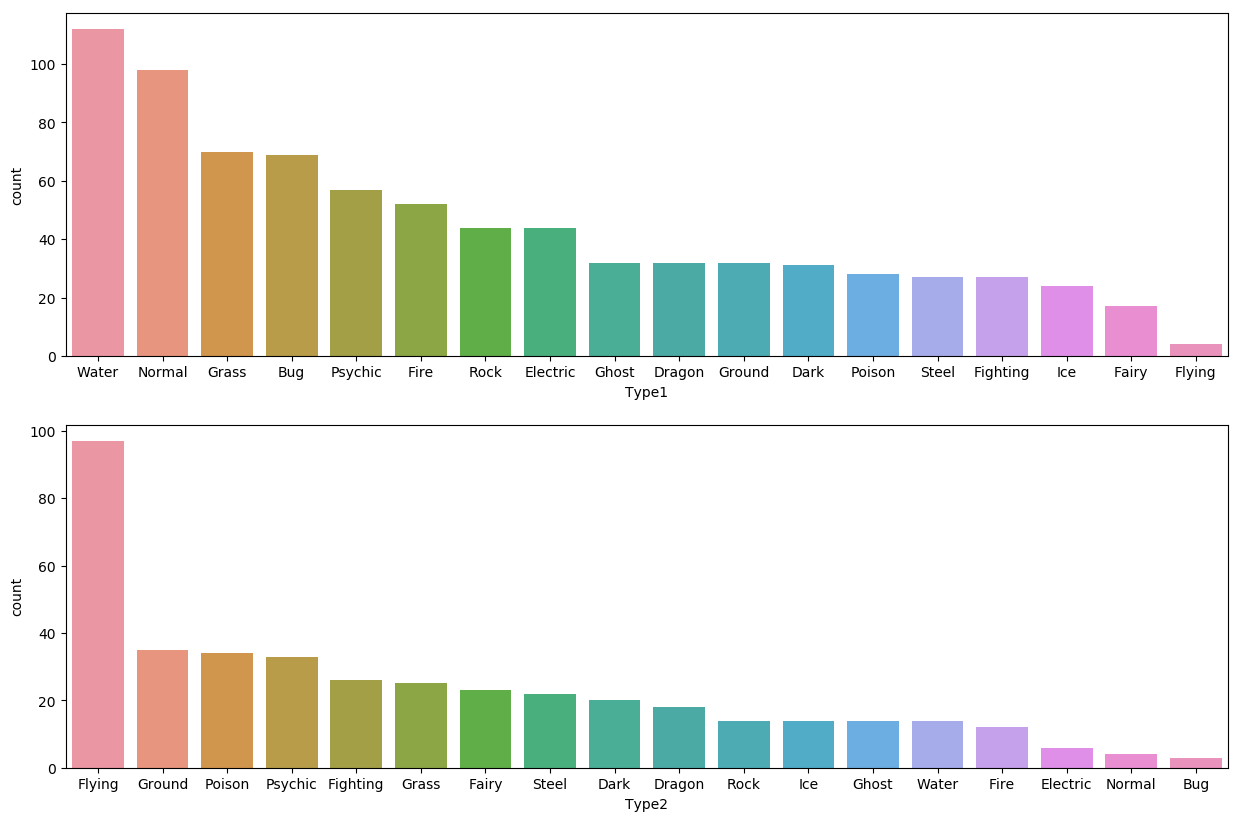

In [52]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1 = sns.countplot(x="Type1", order= pokemon['Type1'].value_counts().index, data = pokemon, ax = ax1)
ax2 = sns.countplot(x="Type2", order= pokemon_bez_nan['Type2'].value_counts().index, data = pokemon_bez_nan, ax = ax2)
plt.show()

Z wykresów wynika, że:
* Typ `Normal` i `Water` występują najczęściej jako `Type1`,
* `Type2` wygląda jakby miał na celu wyrównać liczbe pokemonów każdego typu, np. pokemonów typu `Flying` jest najmniej dla typu podstawowego, a dla dodatkowego najwięcej,
* `Type2` posiada około połowy pokemonów, wszystkie pozostałe uzupełniliśmy dla tego wykresu wartością `None`.

In [38]:
pokemon_bez_nan = pokemon.dropna(axis = 0, how="any")
print("Usuwam %d pokemonow z Type2 == NaN" % sum(pd.isnull(pokemon["Type2"])))
pokemon_bez_nan.head()

Usuwam 386 pokemonow z Type2 == NaN


Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
Name                                                                      
Bulbasaur              Grass  Poison    318  45      49       49     65   
Ivysaur                Grass  Poison    405  60      62       63     80   
Venusaur               Grass  Poison    525  80      82       83    100   
VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   
Charizard               Fire  Flying    534  78      84       78    109   

                       SpDef  Speed  Generation  Legendary  
Name                                                        
Bulbasaur                 65     45           1      False  
Ivysaur                   80     60           1      False  
Venusaur                 100     80           1      False  
VenusaurMega Venusaur    120     80           1      False  
Charizard                 85    100           1      False

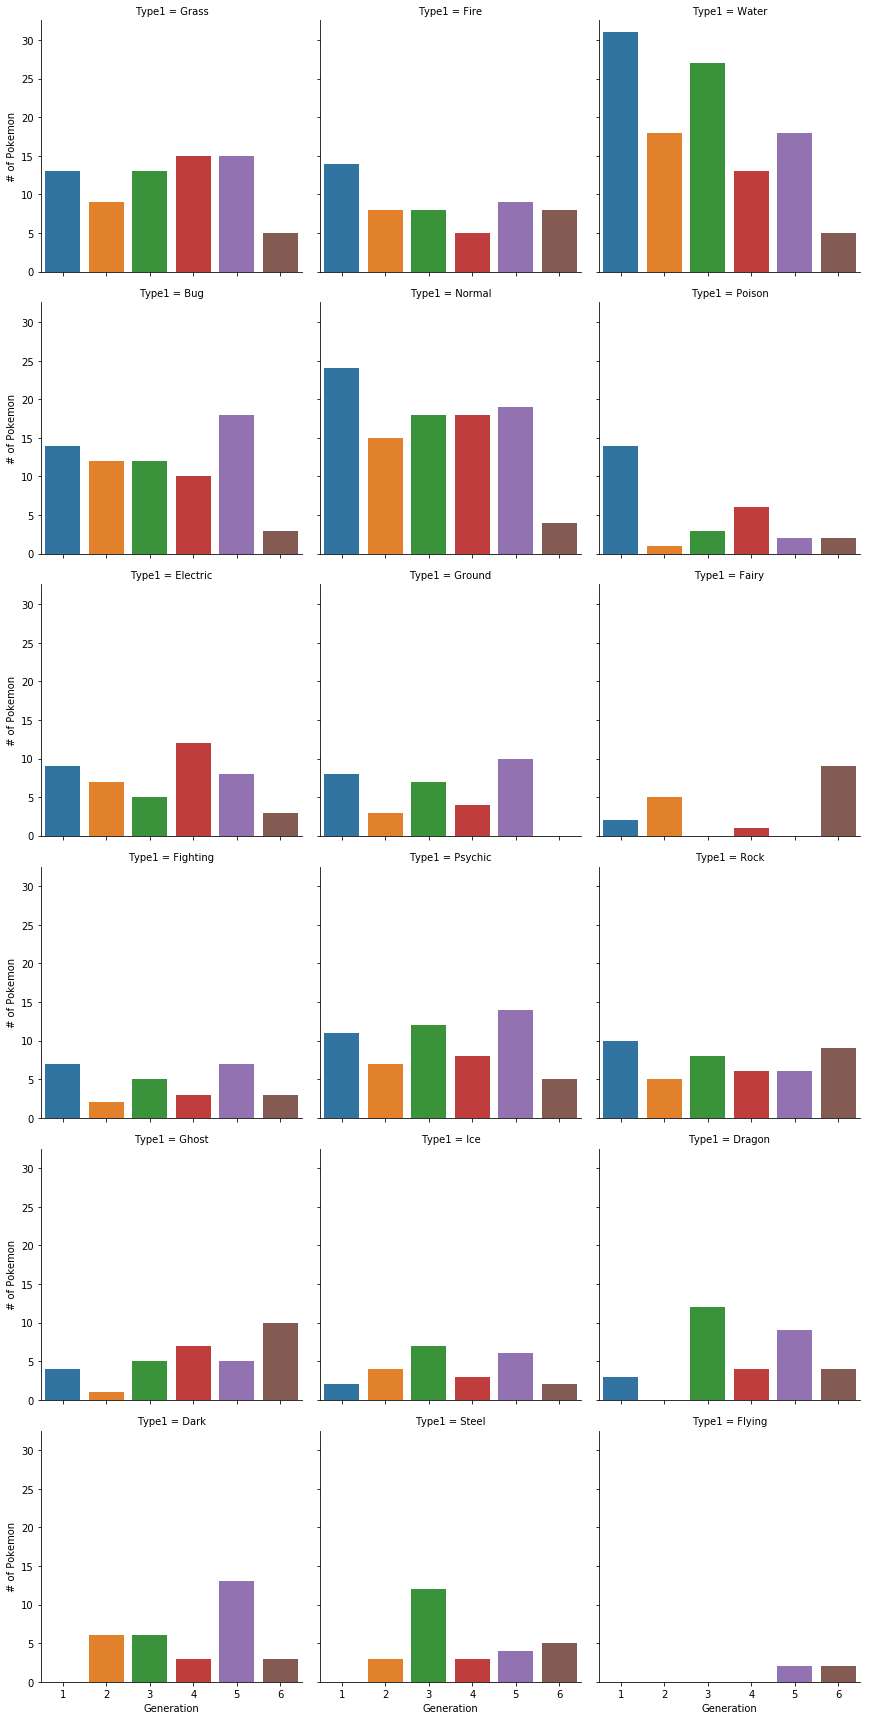

In [55]:
sns.factorplot(x='Generation', data=pokemon, col='Type1', kind='count', col_wrap=3
    ).set_axis_labels('Generation', '# of Pokemon')

Dla typu podstawowego `Type1` można wyciągnąć następujące wnioski:
* Typy `Water` i `Normal` pojawiały się licznie przez 5 generacji, w 6 generacji dodano ich znacznie mniej
* Typ `Dark` pojawił się dopiero w 2 generacji i największy przyrost osobników odnotowany został w 5 generacji
* Pokemony typu `Steel` największy przyrost miały w generacji 3
* `Flying` jako typ podstawowy stał się dopiero w 5 generacji, wcześniej musiał być typem dodatkowym, stad brak takich pokemonów przez 4 generacje

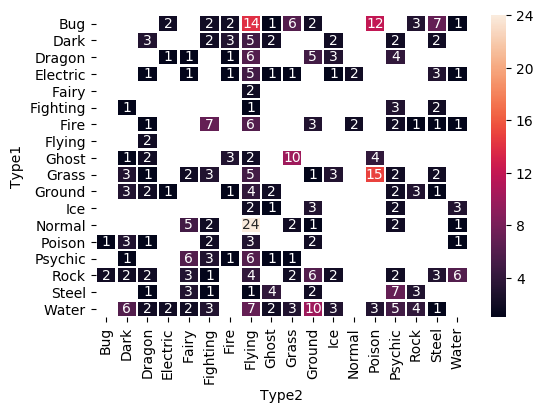

In [64]:
plt.figure(dpi = 100)
sns.heatmap(pokemon_bez_nan.groupby(['Type1', 'Type2']).size().unstack(),
    linewidths=1, annot=True)

Najczęstsze połączenia typów (`Type1/Type2`):
* `Normal/Flying` - 24
* `Grass/Poison` - 15
* `Bug/Flying` - 14
* `Bug/Poison` - 12
* `Water/Ground` - 10
* `Ghost/Grass` - 10<br>
Najczęściej występujące pary po odwróceniu typów nie są równie pospolite, np. `Flying/Normal` - 0, `Poison/Bug` - 1

In [67]:
pokemon_corr = pokemon.corr()
pokemon_corr = pokemon_corr.drop(["Generation", "Legendary"],axis = 1)
pokemon_corr = pokemon_corr.drop(["Generation", "Legendary"],axis = 0)
pokemon_corr

Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
SpAtk    0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
SpDef    0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

Parametry pokemonów nie są dostatecznie silnie skorelowane. Prawie wszystkie statystyki są silnie skorelowane z wartością `Total`, w co trudno jest się dziwić. Jednak można zauważyć, że `SpDef` jest skorelowany z `Defense` oraz `SpAtk`. Warto przeprowadzić taką analizę w obrębie poszczególnych typów.

In [125]:
for typ in dostepne_typy:
    print(typ)
    print(pokemon[(pokemon.Type1 == typ) | (pokemon.Type2 == typ)].corr(), "\n\n\n")

Grass
               Total        HP    Attack   Defense     SpAtk     SpDef  \
Total       1.000000  0.794219  0.797910  0.681216  0.761167  0.714322   
HP          0.794219  1.000000  0.697179  0.480884  0.587854  0.507461   
Attack      0.797910  0.697179  1.000000  0.539378  0.555039  0.374845   
Defense     0.681216  0.480884  0.539378  1.000000  0.249133  0.521559   
SpAtk       0.761167  0.587854  0.555039  0.249133  1.000000  0.472417   
SpDef       0.714322  0.507461  0.374845  0.521559  0.472417  1.000000   
Speed       0.628974  0.305164  0.338922  0.218472  0.431635  0.329279   
Generation  0.032349  0.074976  0.101145  0.183544 -0.270469 -0.021982   
Legendary   0.308478  0.297853  0.181802  0.066227  0.210048  0.261661   

               Speed  Generation  Legendary  
Total       0.628974    0.032349   0.308478  
HP          0.305164    0.074976   0.297853  
Attack      0.338922    0.101145   0.181802  
Defense     0.218472    0.183544   0.066227  
SpAtk       0.431635   

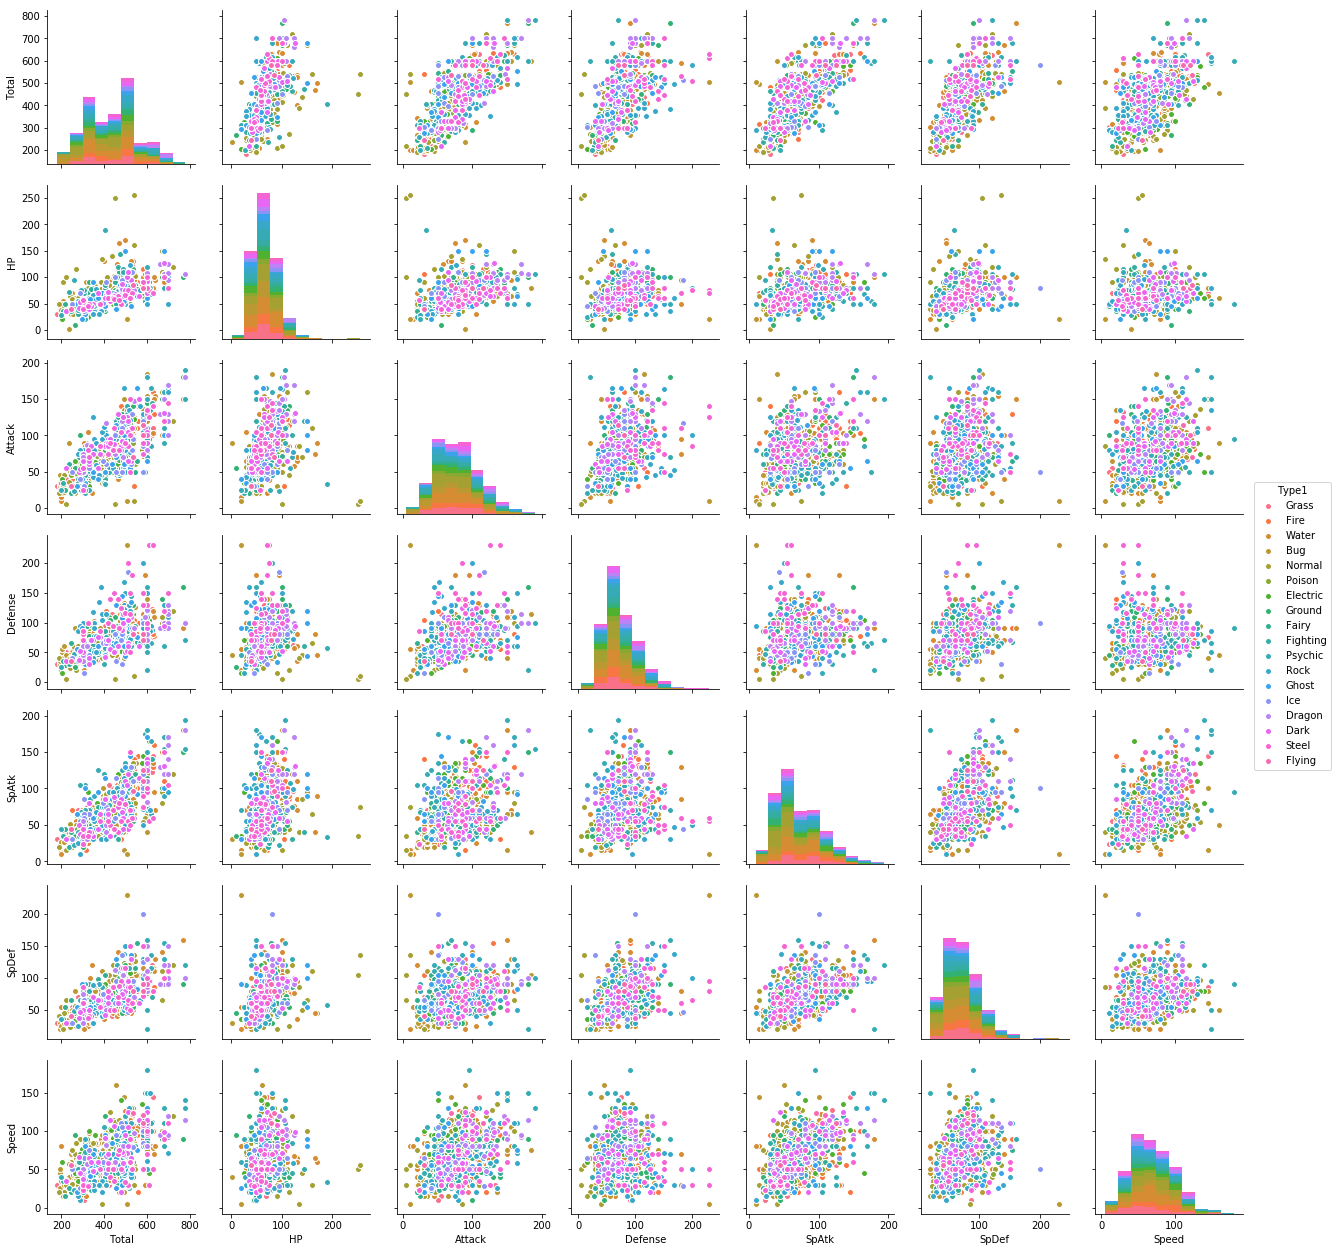

In [73]:
pokemon_wykres_type1 = pokemon.drop(["Generation", "Legendary"],axis = 1)
sns.pairplot(pokemon_wykres_type1, kind="scatter", hue="Type1")
plt.show()

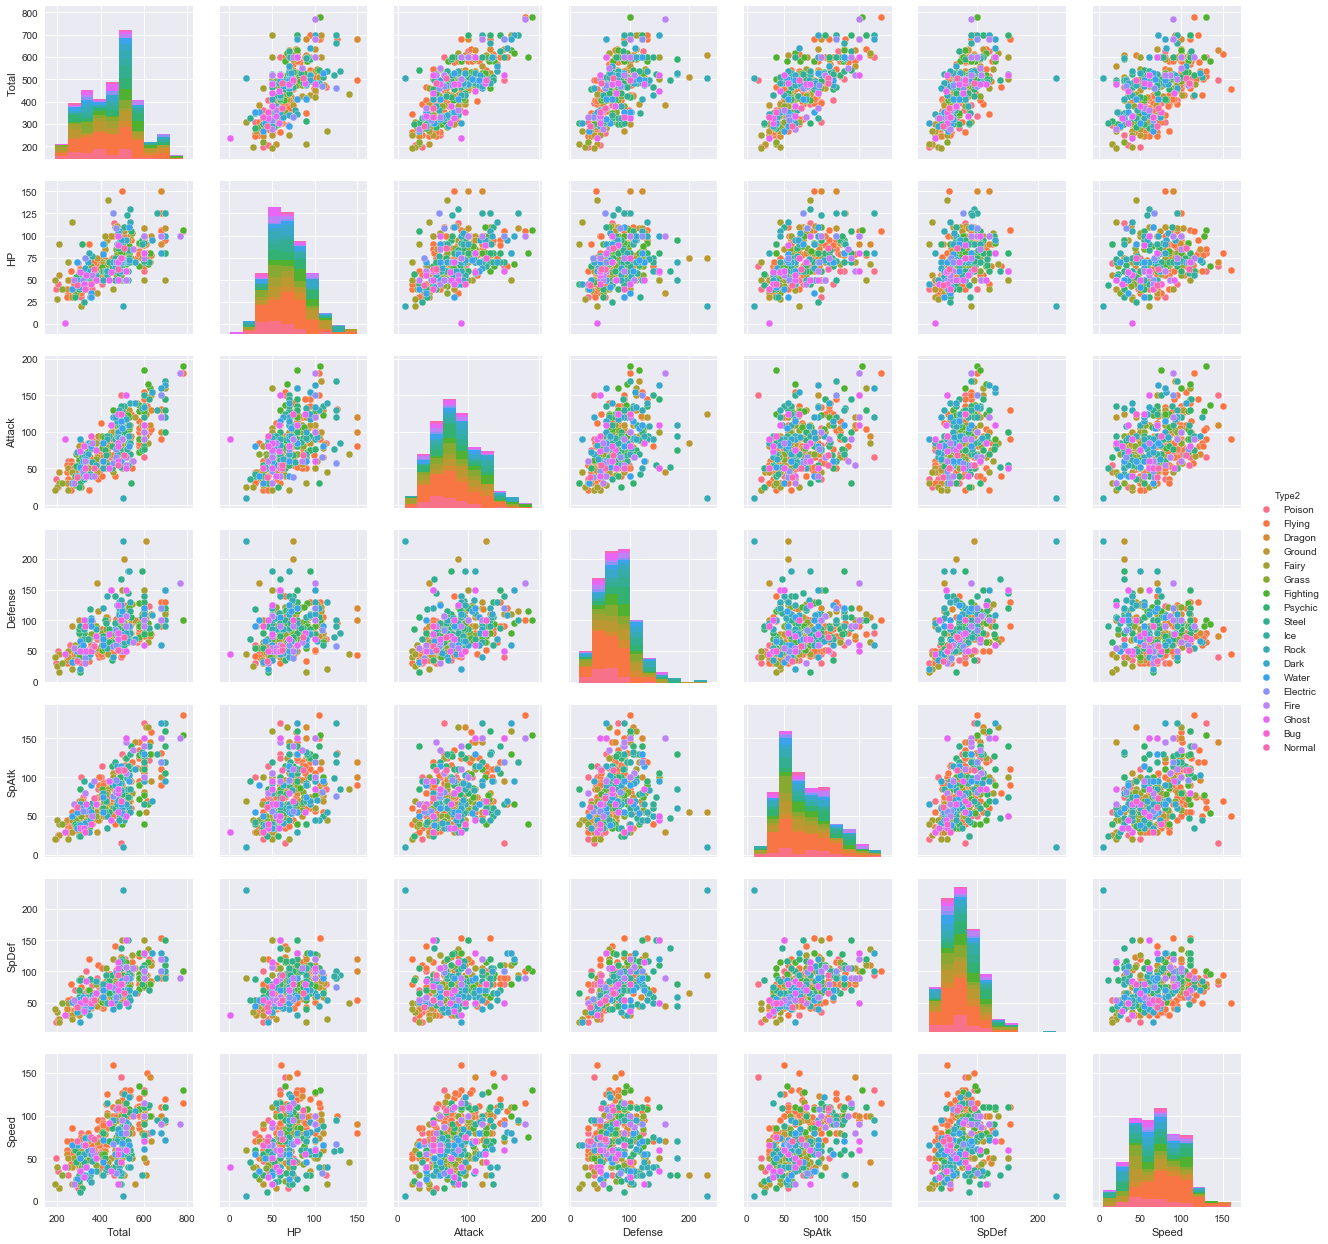

In [64]:
pokemon_wykres_type2 = pokemon_wykres_type1.dropna(axis = 0, how="any")
sns.pairplot(pokemon_wykres_type2, kind="scatter", hue="Type2")
plt.show()

Dla każdego typu nowy wykres korelacji. Możliwe, że atatystyki będą bardziej skorelowane w obrębie typów niż ogółu. Dodatkowo wykresy będą czytelniejsze niż gdy wszystkie typy są na jednym wykresie.
Po dodaniu `hue="Type1` otrzymamy korelacje dla pokemonów posiadających też 2 typy, więc pojawią się na każdym wykresie możliwe kombinacje do obecnie badanego typu. Bez `hue` warto użyć `print(typ)` przed każdym wykresem

Grass


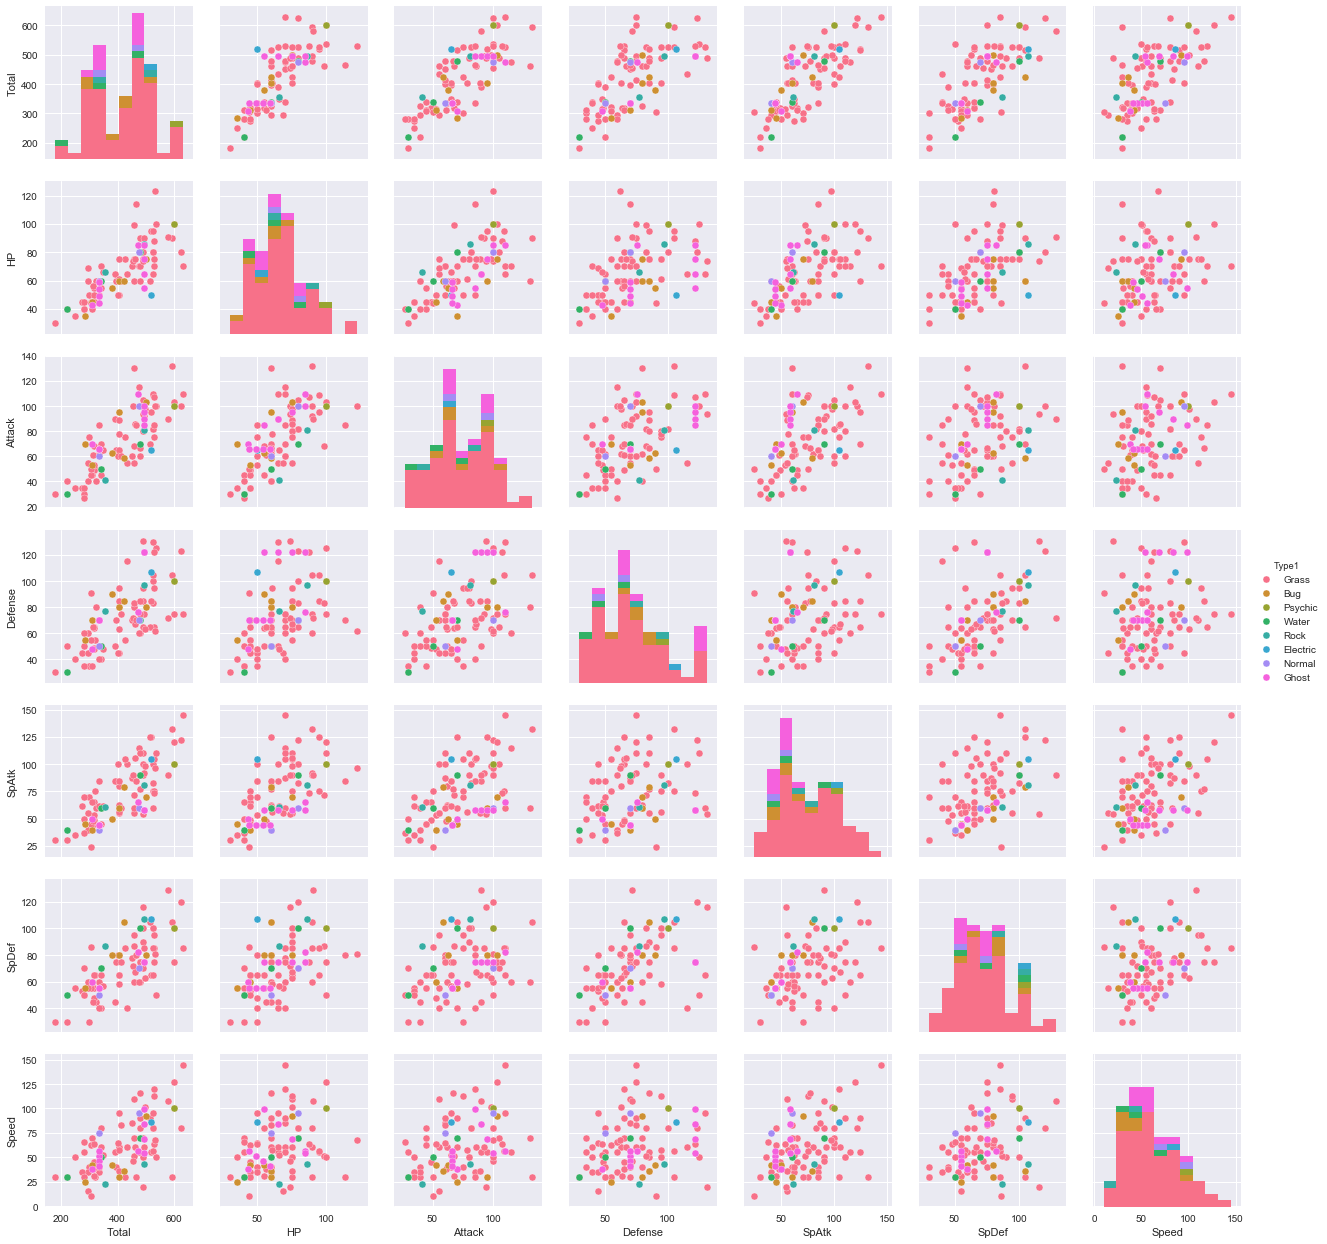

Fire


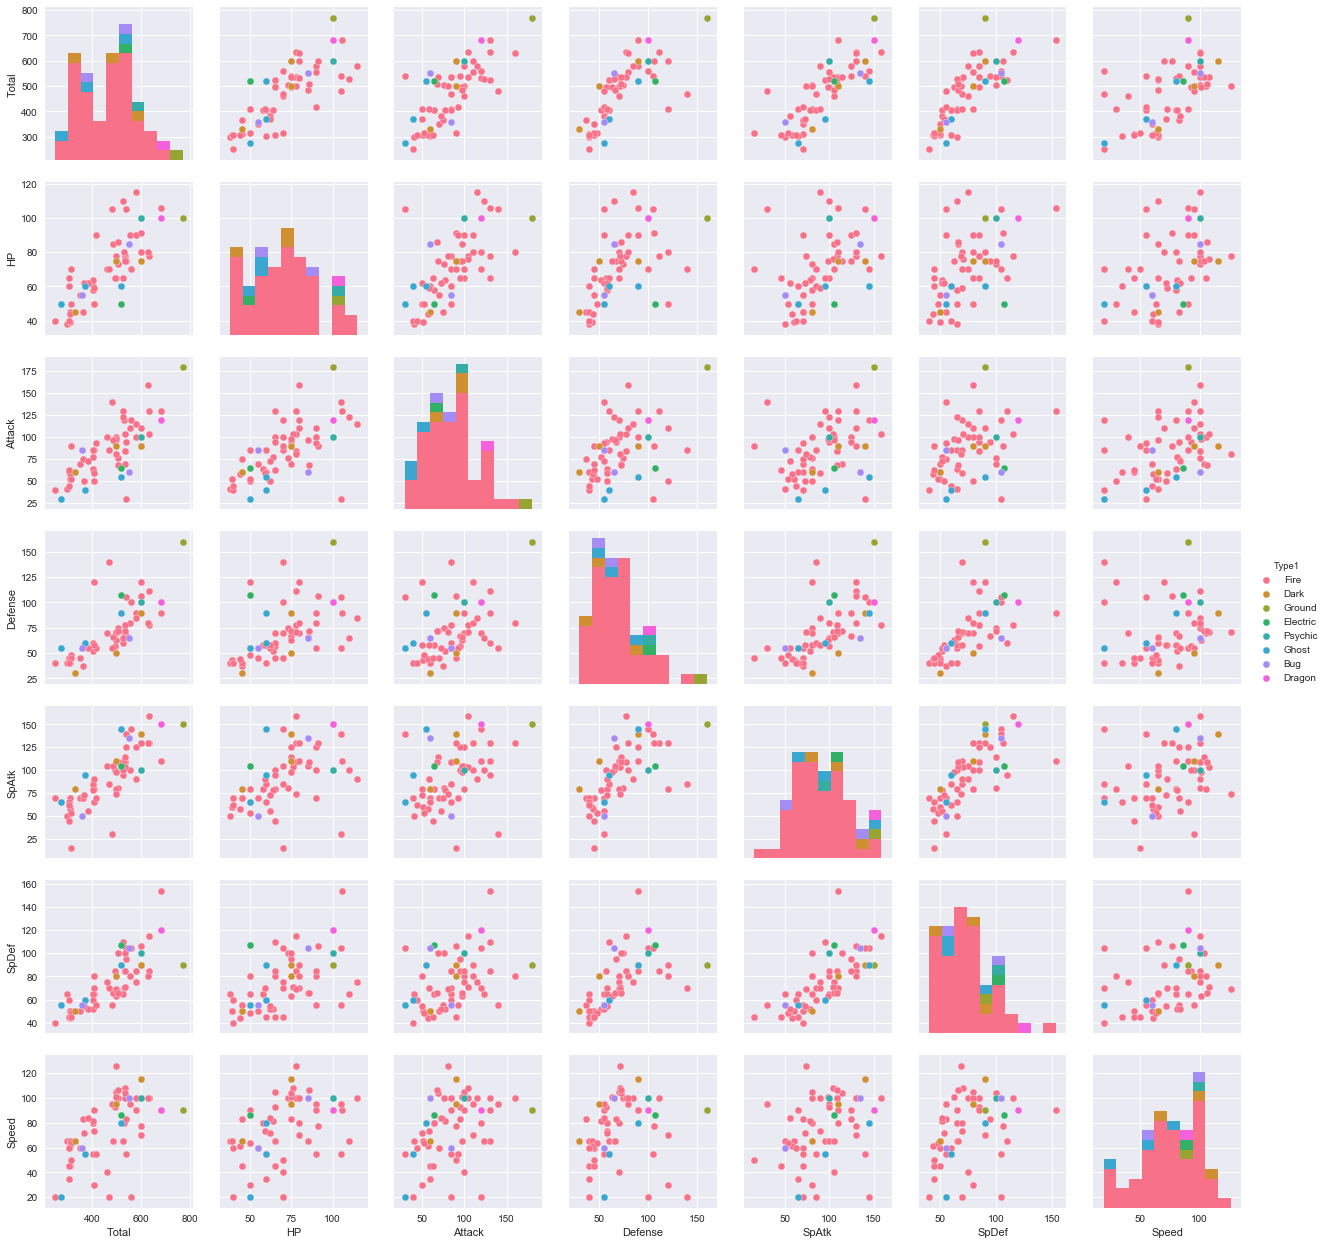

Water


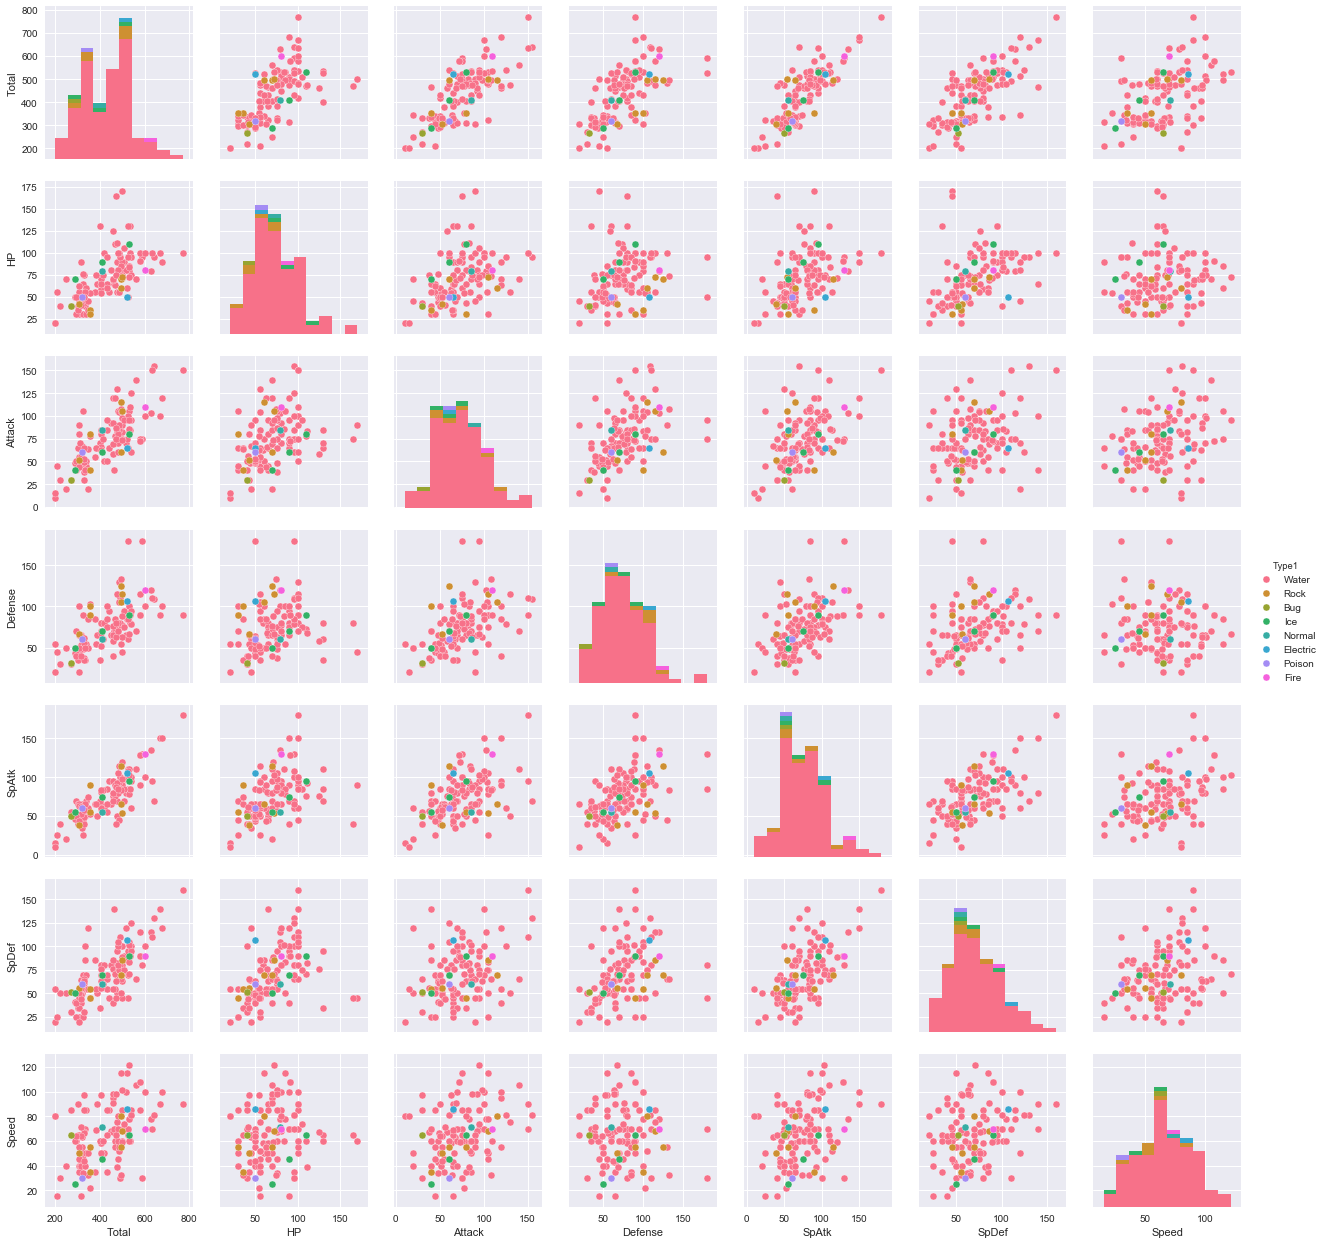

Bug


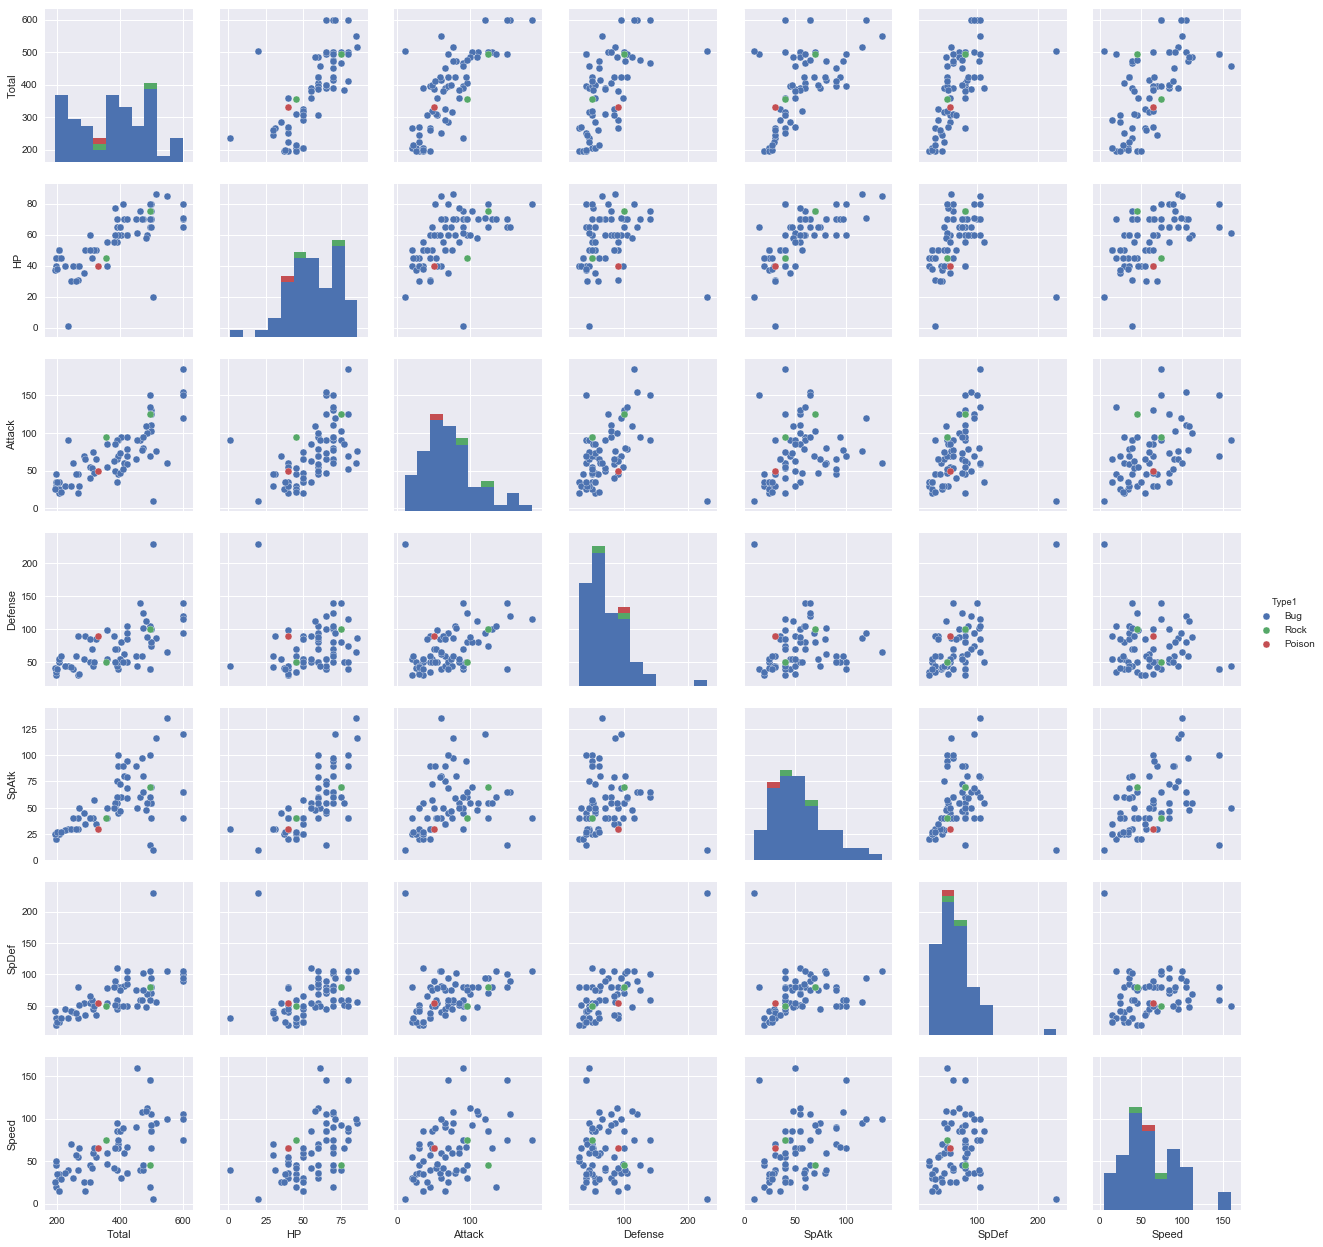

Normal


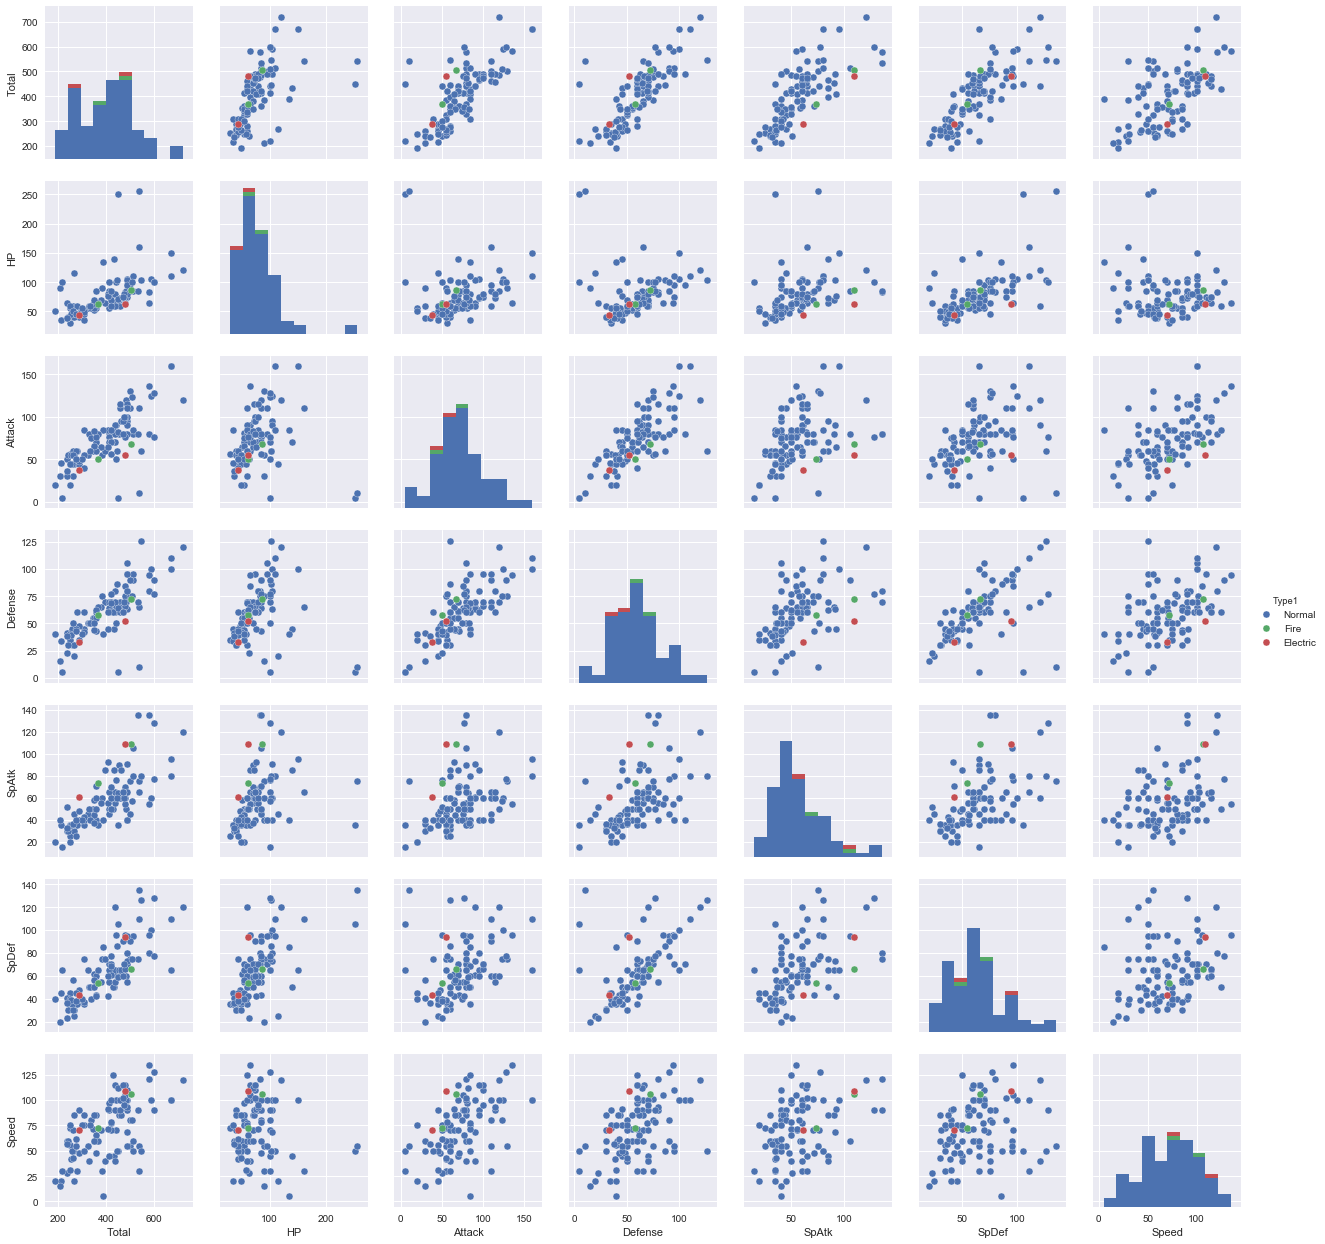

Poison


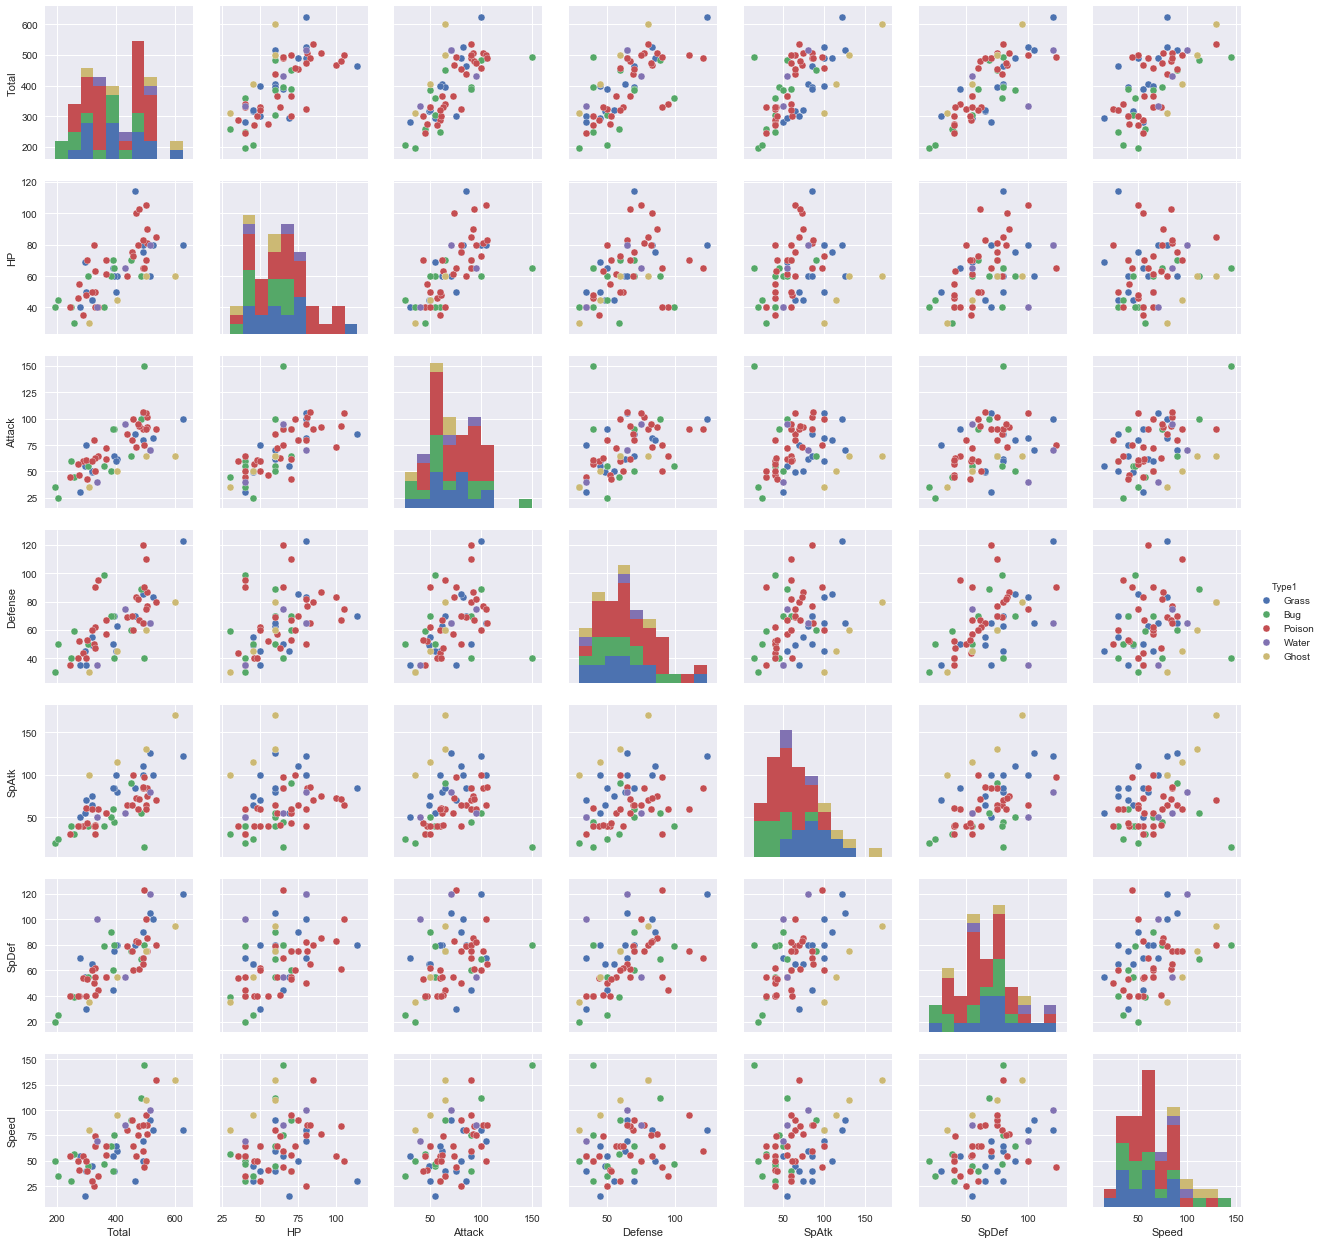

Electric


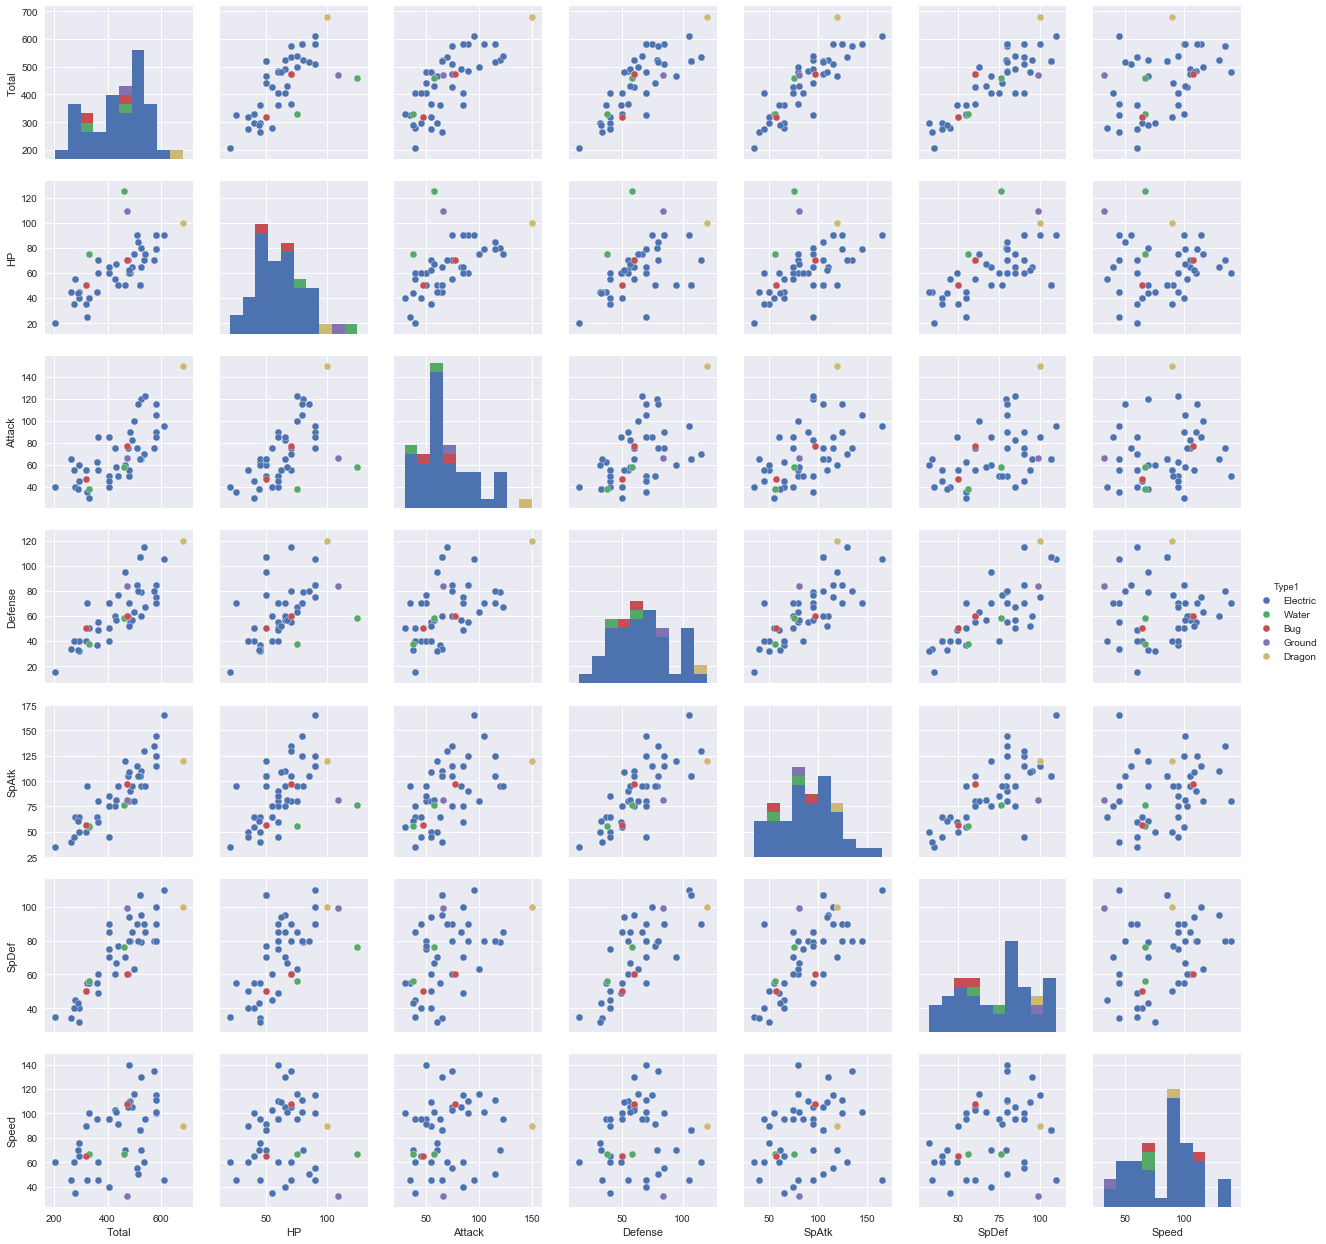

Ground


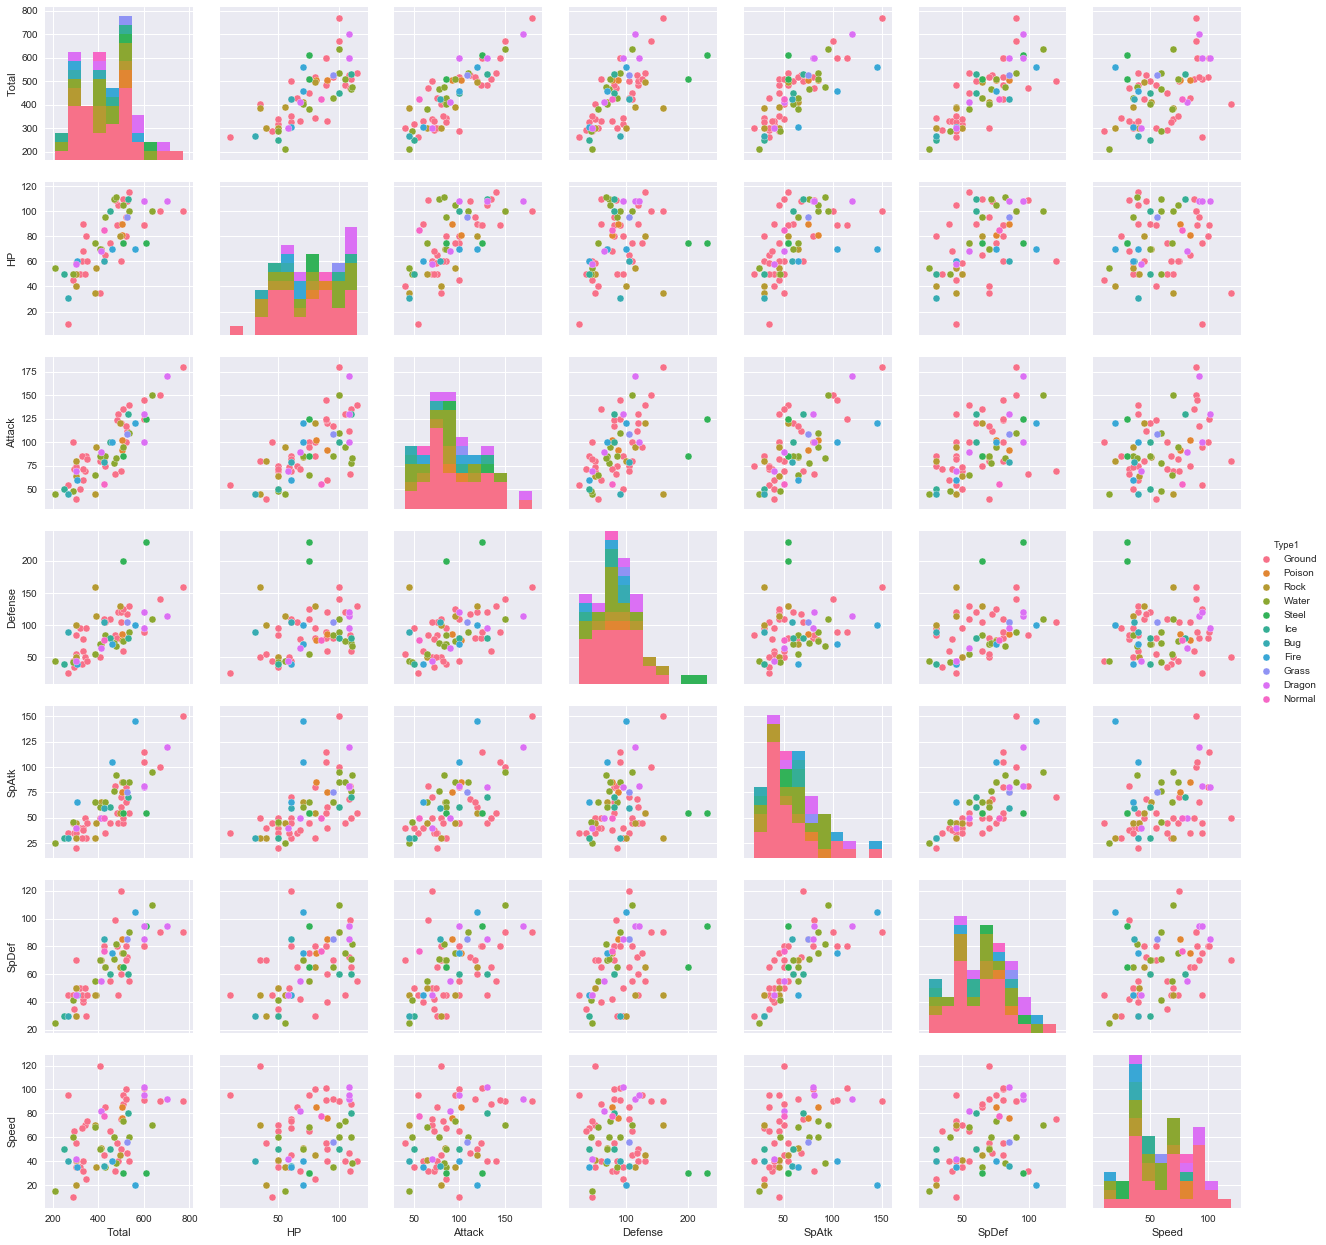

Fairy


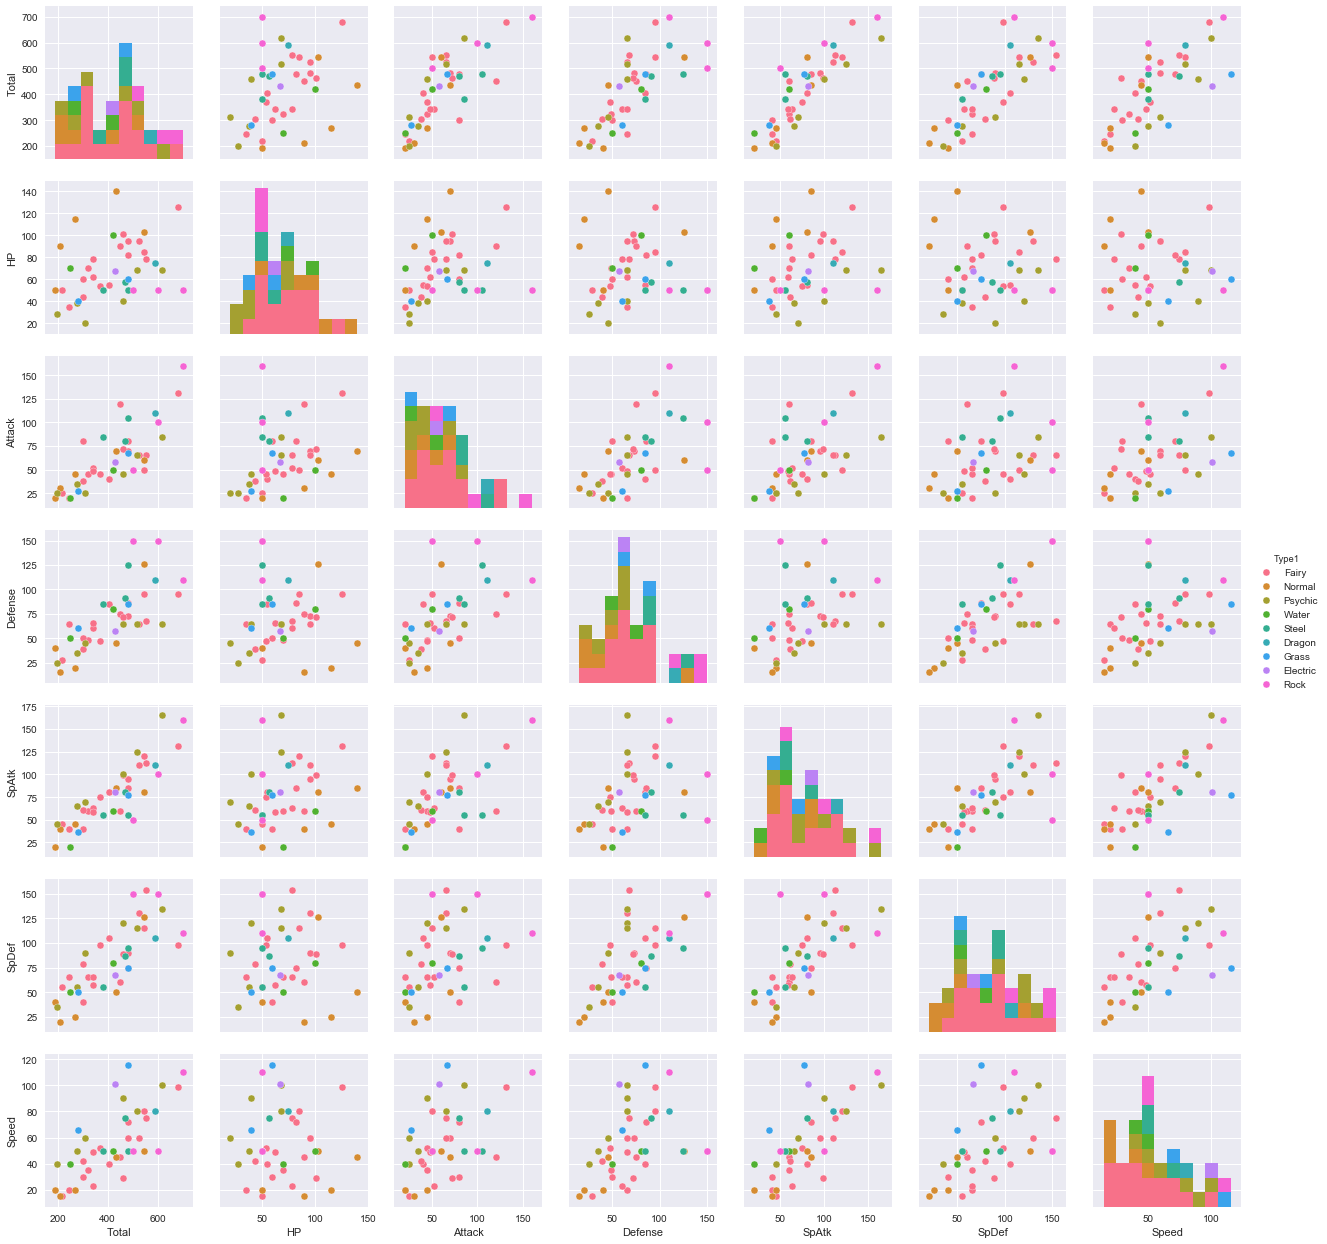

Fighting


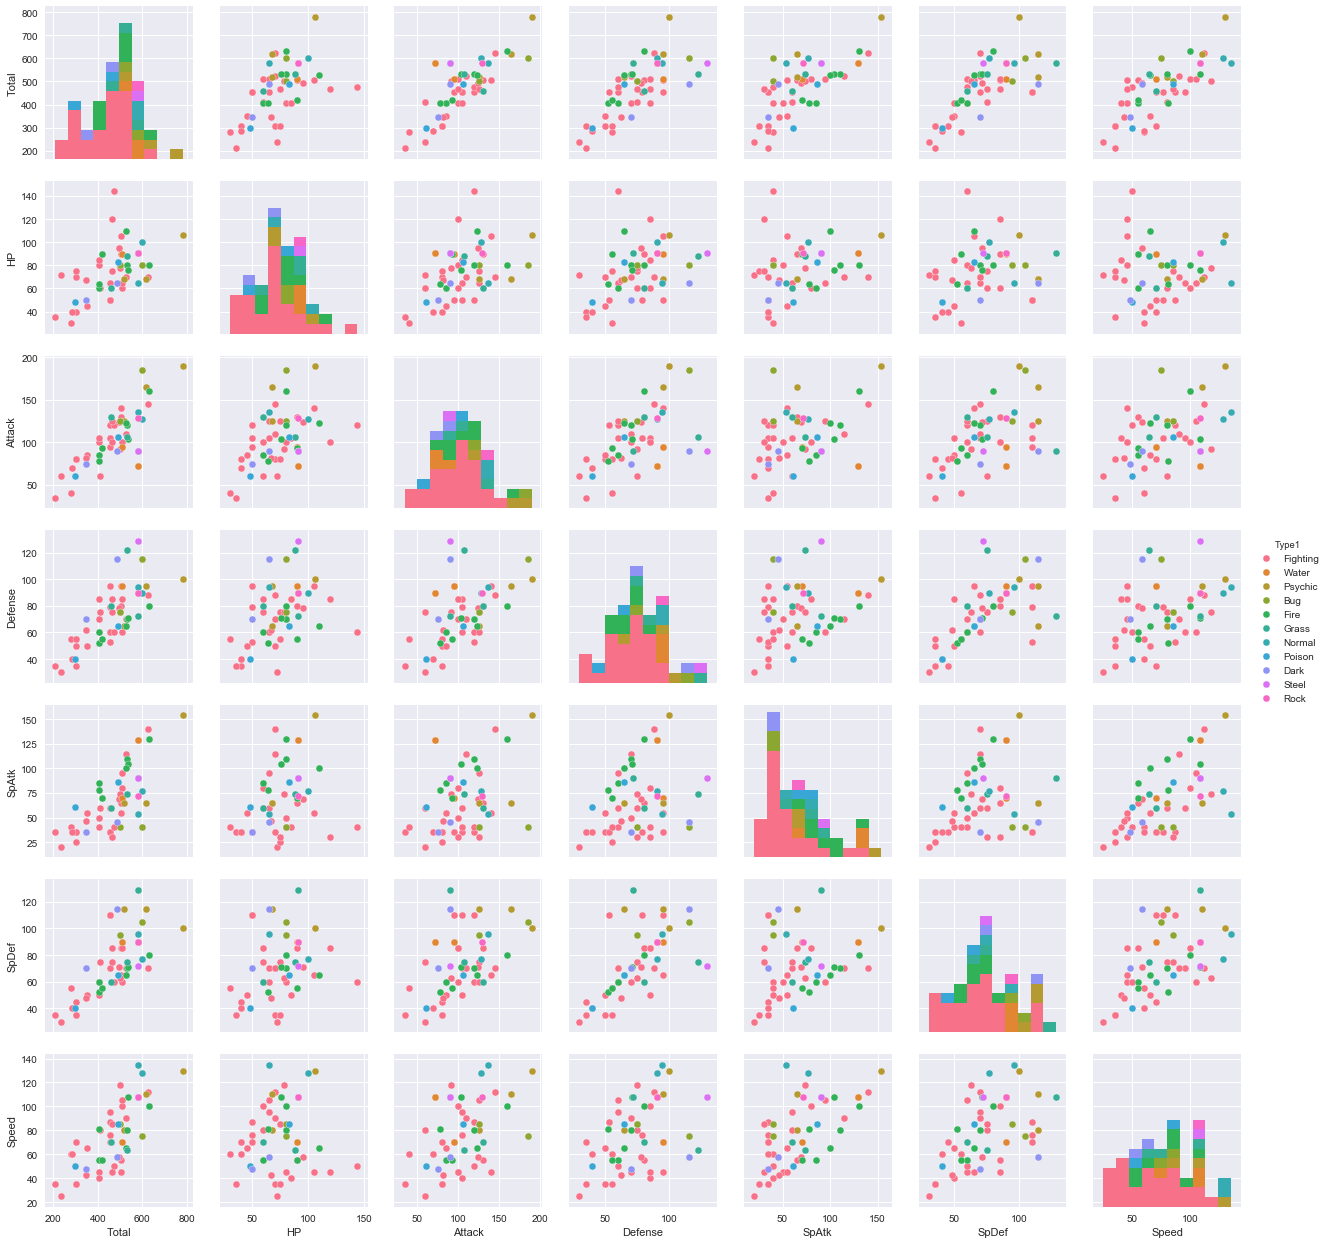

Psychic


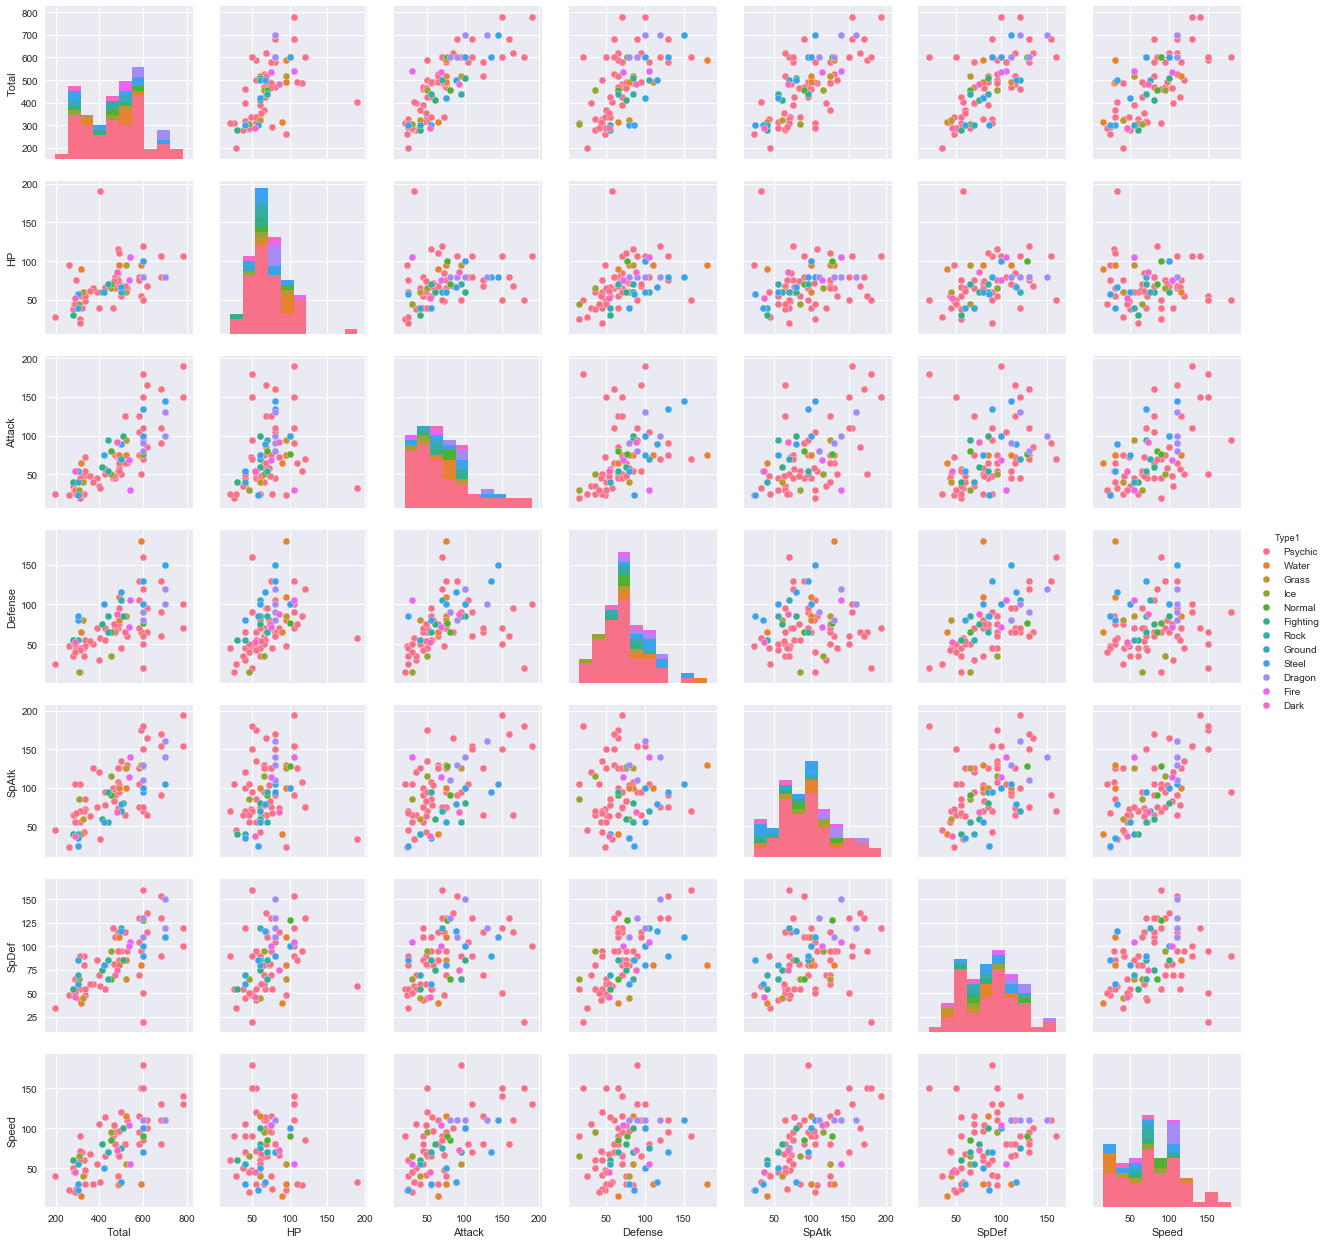

Rock


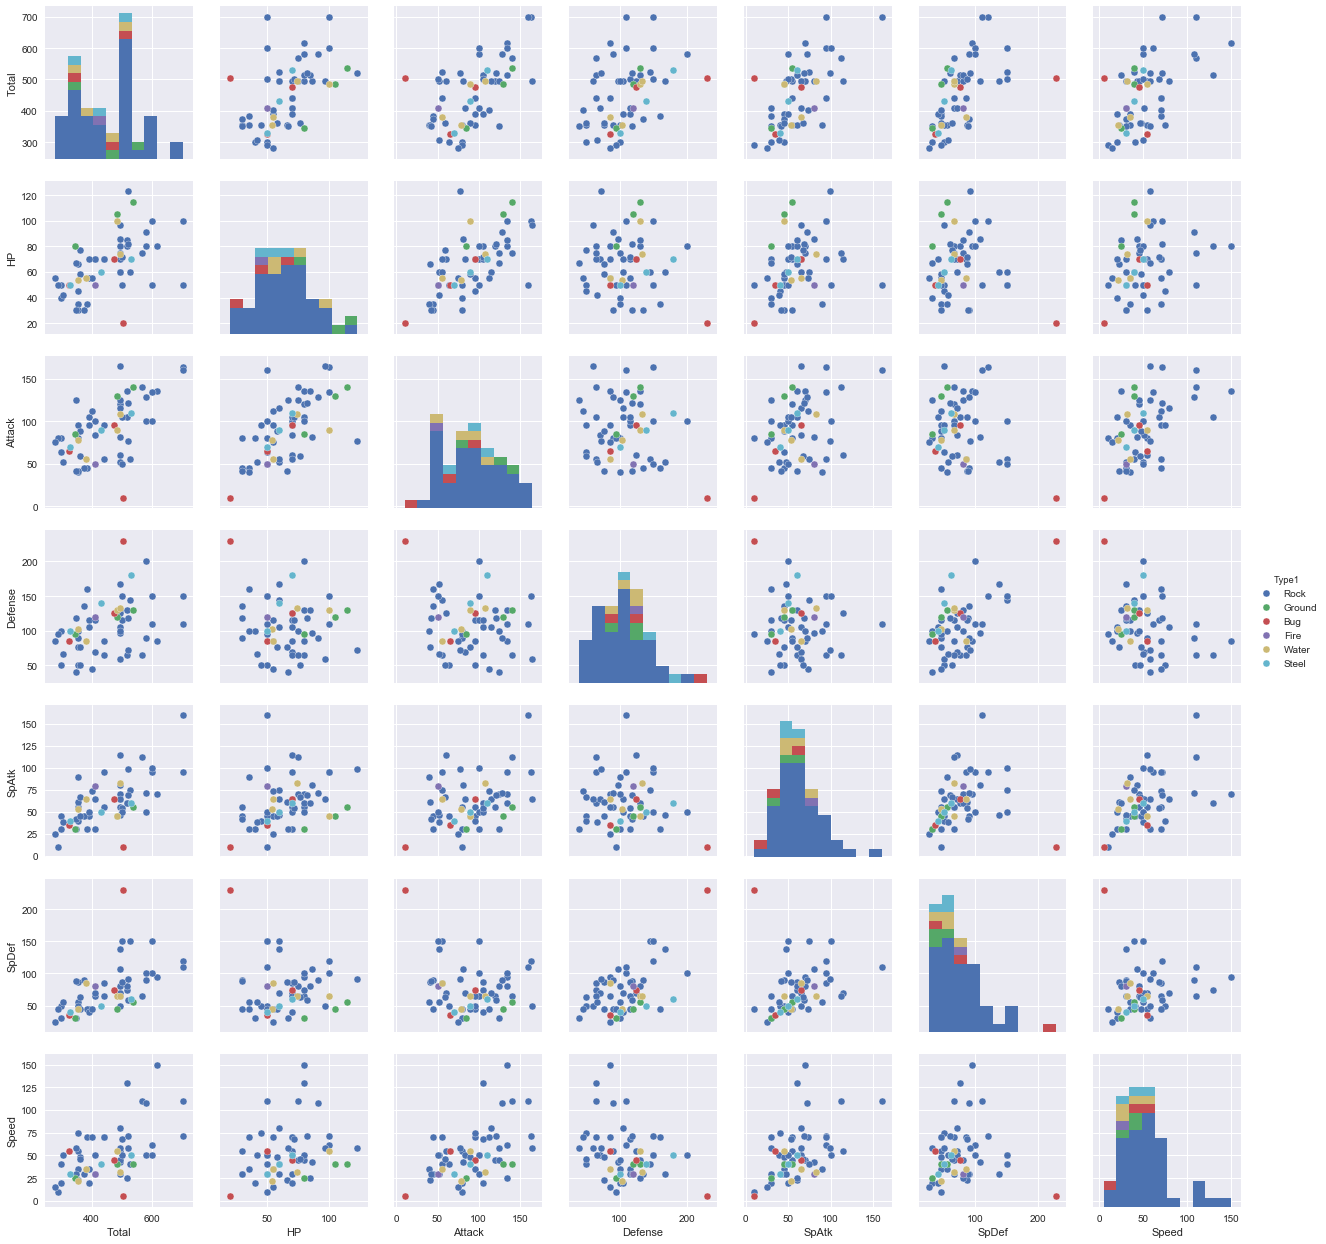

Ghost


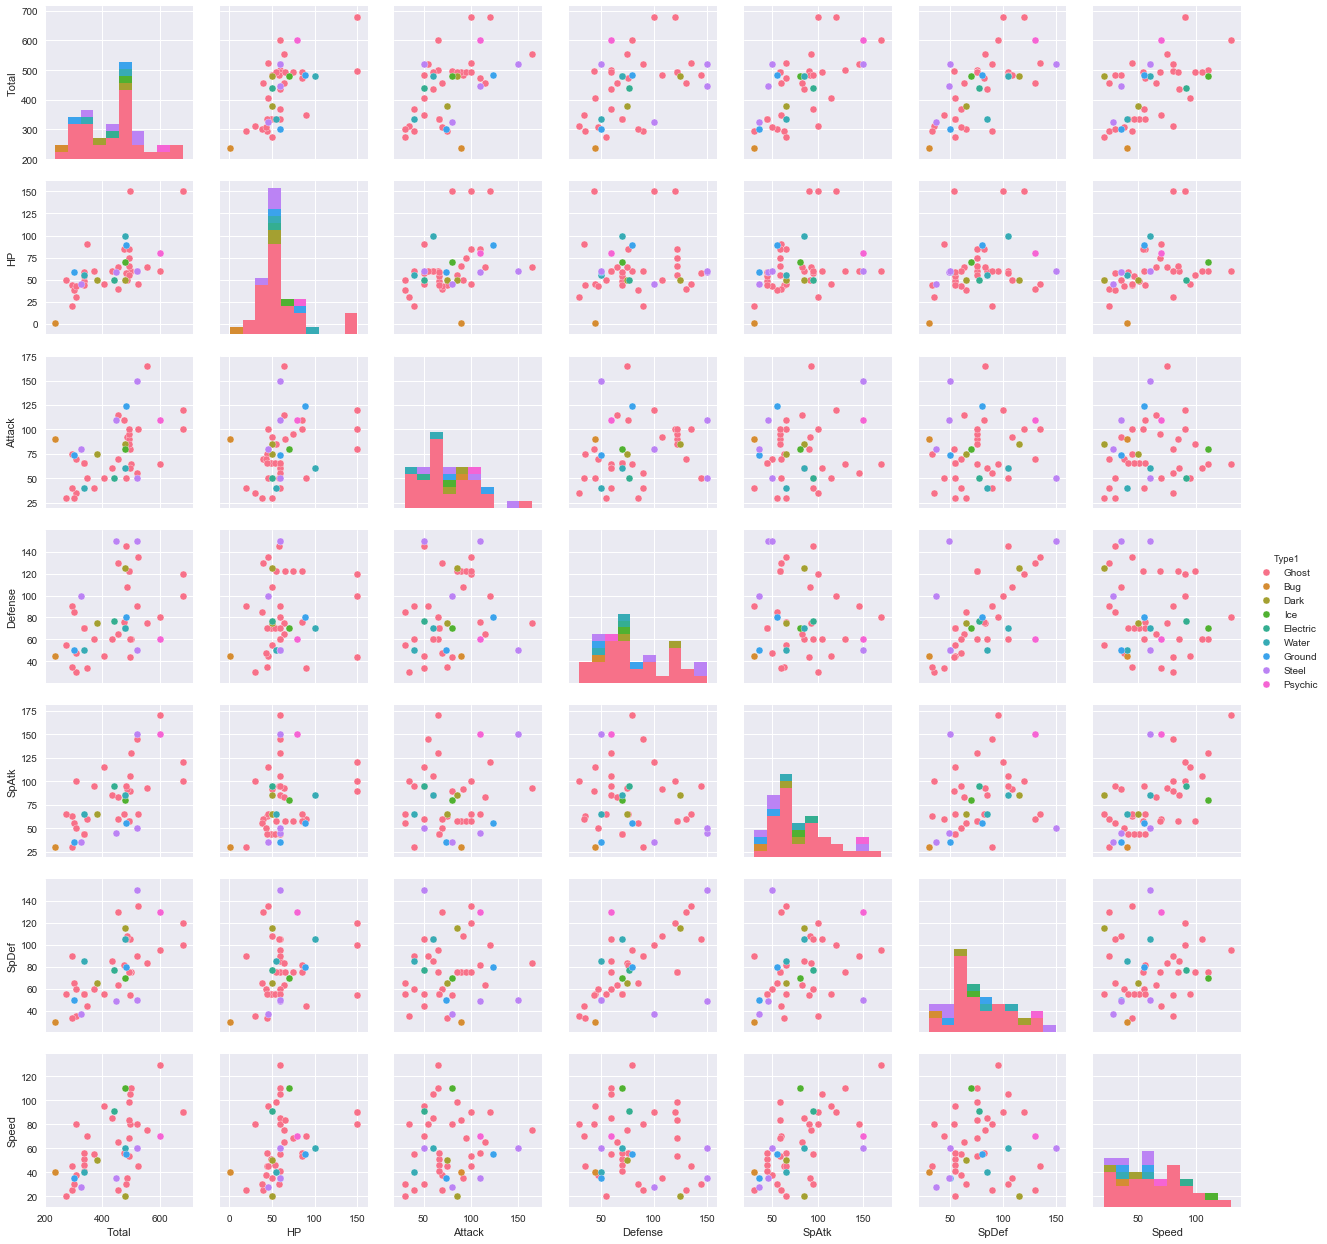

Ice


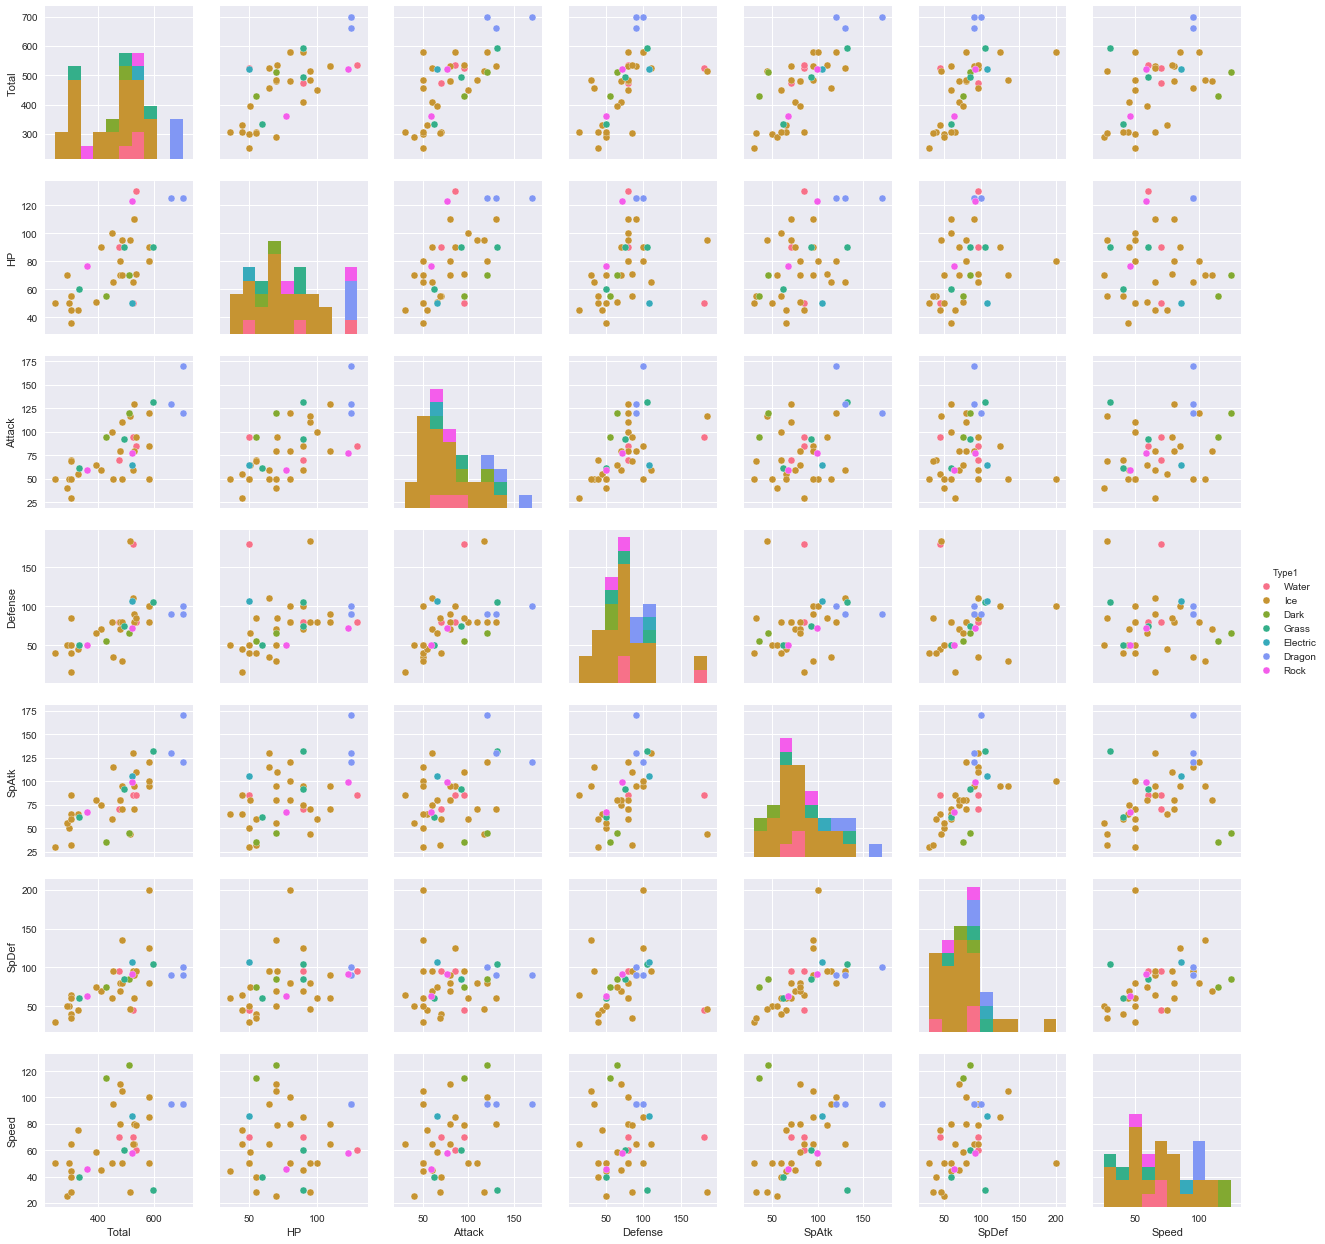

Dragon


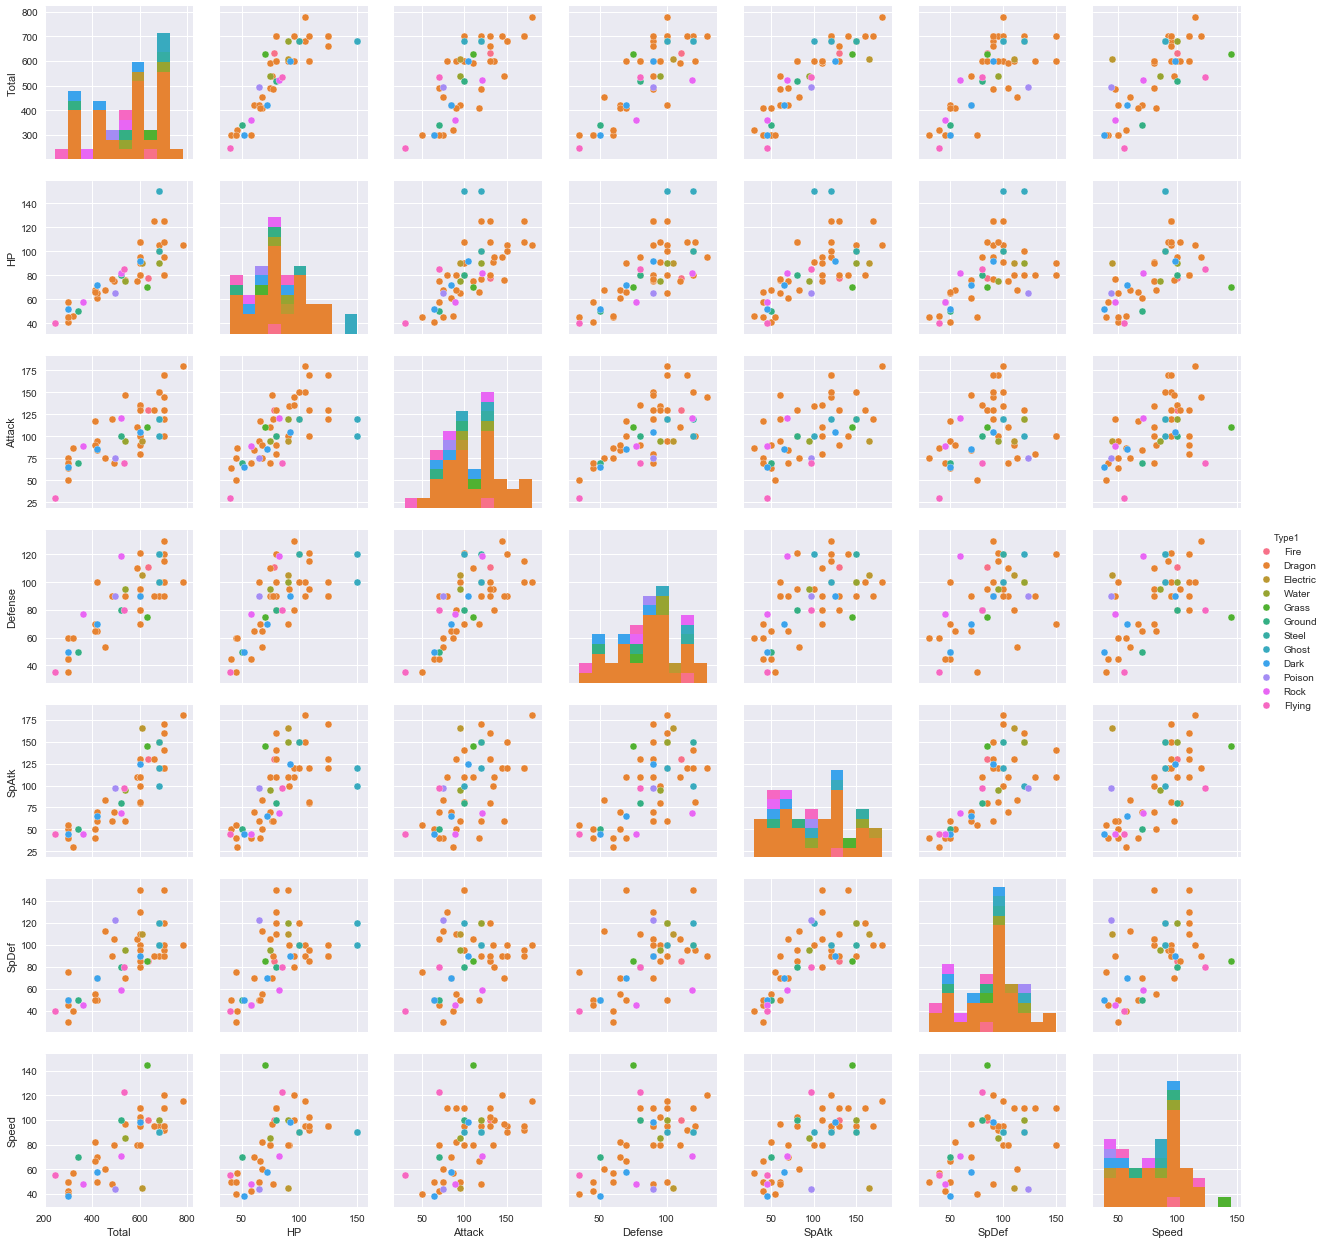

Dark


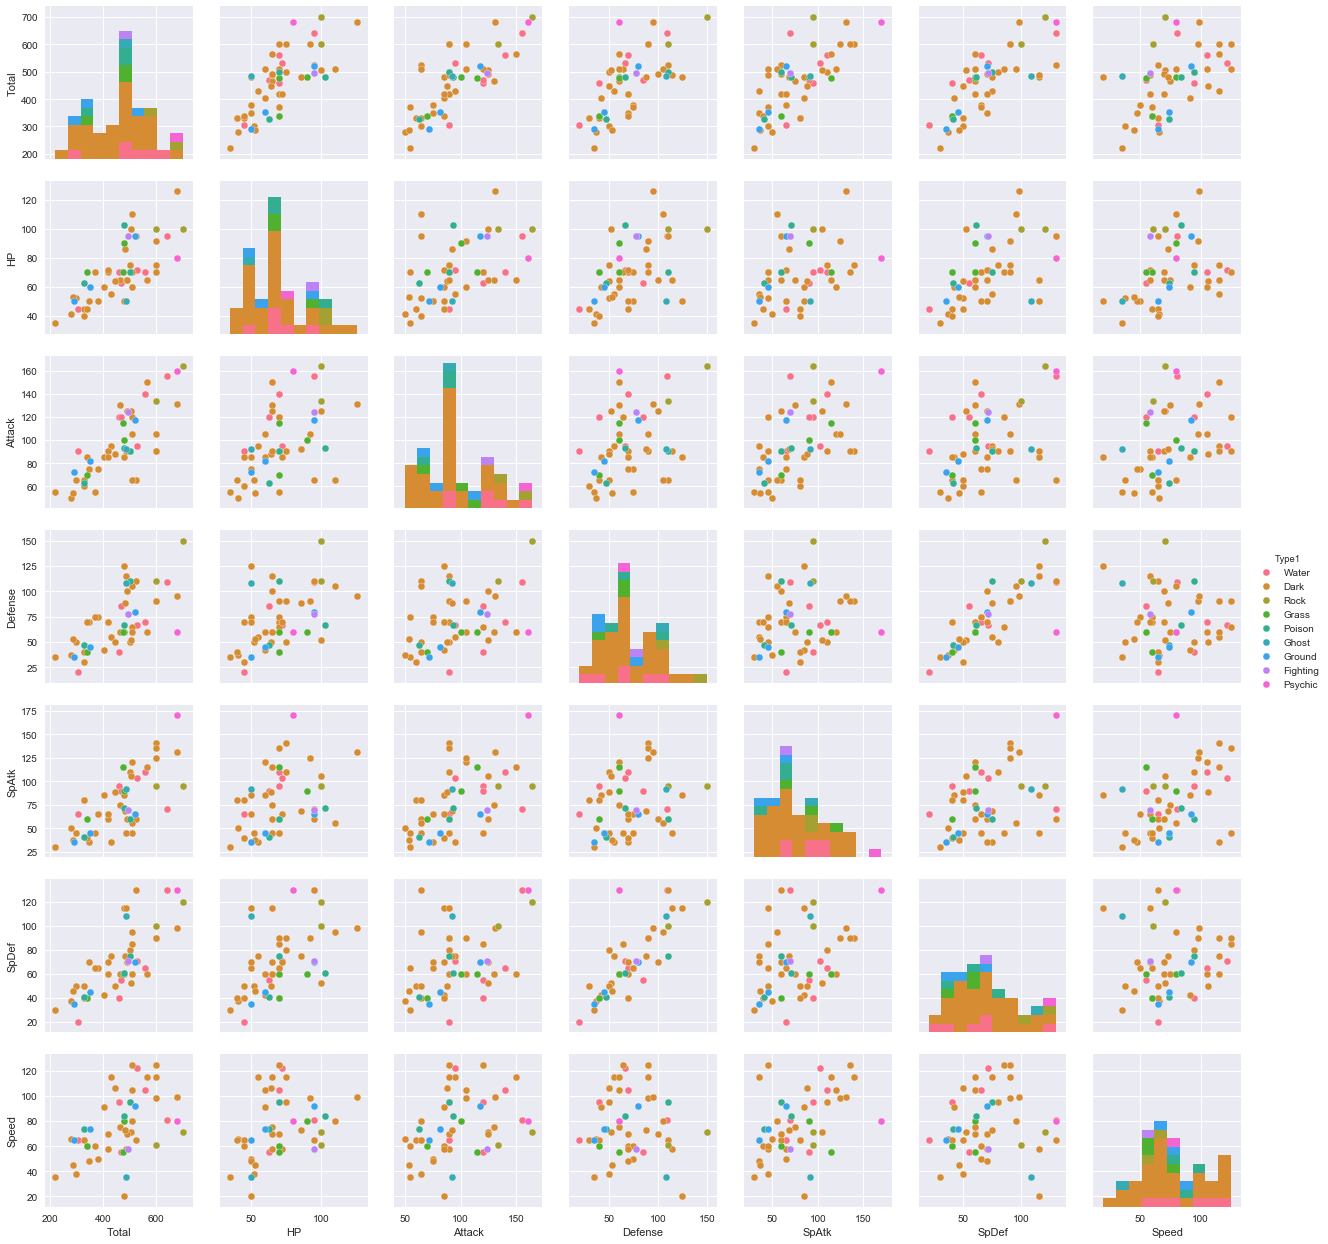

Steel


In [ ]:
pokemon_corr_by_type = pokemon_wykres_type1.copy()
for typ in dostepne_typy:
    print(typ)
    sns.pairplot(pokemon_corr_by_type[(pokemon_corr_by_type.Type1 == typ) | (pokemon_corr_by_type.Type2 == typ)], 
                 kind="scatter", hue="Type1")
    plt.show()